In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
n=list(X.columns)

In [11]:
X[n] = scaler.fit_transform(X[n])

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [13]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

C:\Users\SNEHA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# Making predictions
predictions = rfc.predict(X_test)

In [17]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [18]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.87      0.83       150
          1       0.71      0.59      0.64        81

avg / total       0.77      0.77      0.77       231



In [19]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[130  20]
 [ 33  48]]


In [20]:
print(accuracy_score(y_test,predictions))

0.7705627705627706


In [21]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [22]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022001,0.004858,0.0014,0.000490,2,{'max_depth': 2},0.750000,0.703704,0.728972,0.785047,...,0.733706,0.031275,2,0.773893,0.778555,0.737209,0.753488,0.772093,0.763048,0.015485
1,0.022001,0.003522,0.0024,0.001497,7,{'max_depth': 7},0.675926,0.722222,0.869159,0.719626,...,0.744879,0.065366,1,0.944056,0.920746,0.934884,0.927907,0.932558,0.932030,0.007712
2,0.020201,0.000400,0.0018,0.000400,12,{'max_depth': 12},0.703704,0.666667,0.803738,0.747664,...,0.726257,0.046420,3,0.976690,0.983683,0.986047,0.976744,0.979070,0.980447,0.003783
3,0.020401,0.000490,0.0018,0.000400,17,{'max_depth': 17},0.675926,0.685185,0.775701,0.728972,...,0.724395,0.039017,4,0.986014,0.986014,0.983721,0.979070,0.983721,0.983708,0.002536


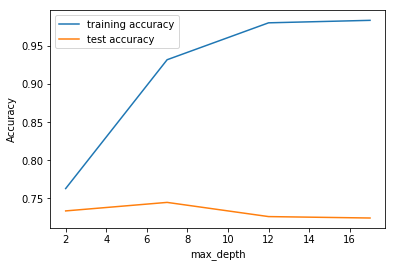

In [23]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [24]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.174810,0.008208,0.008800,0.000748,100,{'n_estimators': 100},0.722222,0.675926,0.831776,0.785047,...,0.750466,0.053506,4,0.848485,0.862471,0.823256,0.832558,0.837209,0.840796,0.013545
1,0.944854,0.032241,0.041602,0.001200,500,{'n_estimators': 500},0.750000,0.694444,0.831776,0.757009,...,0.754190,0.044414,3,0.860140,0.857809,0.809302,0.827907,0.839535,0.838939,0.019005
2,1.707498,0.239184,0.080605,0.010210,900,{'n_estimators': 900},0.759259,0.694444,0.831776,0.766355,...,0.757914,0.044590,2,0.860140,0.857809,0.820930,0.837209,0.839535,0.843125,0.014461
3,3.085776,0.413979,0.144208,0.024977,1300,{'n_estimators': 1300},0.750000,0.712963,0.822430,0.775701,...,0.759777,0.037208,1,0.855478,0.857809,0.818605,0.832558,0.841860,0.841262,0.014597


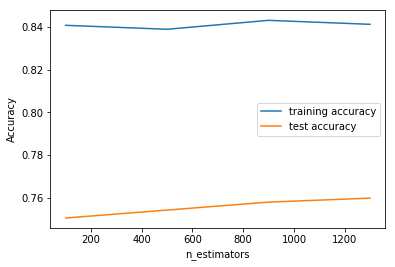

In [26]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [28]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021601,0.004079,0.0018,0.000748,2,{'max_features': 2},0.731481,0.666667,0.831776,0.794393,...,0.748603,0.058074,1,0.829837,0.848485,0.818605,0.809302,0.823256,0.825897,0.013125
1,0.021001,0.001549,0.0014,0.000490,4,{'max_features': 4},0.740741,0.685185,0.813084,0.766355,...,0.746741,0.042260,2,0.860140,0.848485,0.818605,0.813953,0.844186,0.837074,0.017824


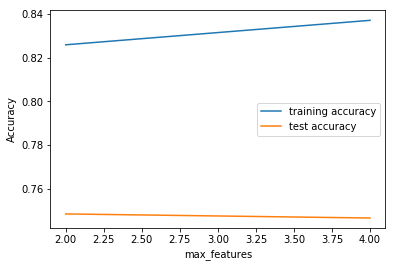

In [30]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [31]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 40, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(10, 40, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022601,0.003826,0.0020,1.784161e-07,10,{'min_samples_leaf': 10},0.685185,0.703704,0.850467,0.728972,...,0.739292,0.057868,2,0.855478,0.843823,0.818605,0.834884,0.825581,0.835674,0.013057
1,0.018001,0.000632,0.0014,4.899208e-04,20,{'min_samples_leaf': 20},0.731481,0.694444,0.831776,0.747664,...,0.748603,0.045260,1,0.827506,0.818182,0.779070,0.790698,0.800000,0.803091,0.017686
2,0.018001,0.002000,0.0012,3.998995e-04,30,{'min_samples_leaf': 30},0.675926,0.666667,0.822430,0.710280,...,0.720670,0.055567,3,0.771562,0.799534,0.774419,0.767442,0.795349,0.781661,0.013141


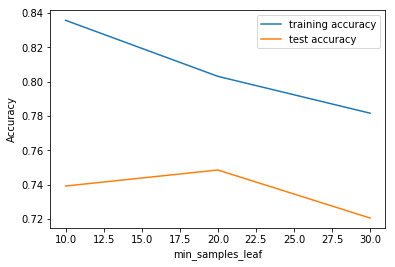

In [33]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 50, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 50, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024201,0.003600,0.0018,0.00040,5,{'min_samples_split': 5},0.731481,0.657407,0.831776,0.738318,...,0.733706,0.056584,7,0.969697,0.965035,0.951163,0.979070,0.960465,0.965086,0.009295
1,0.020601,0.001357,0.0018,0.00040,10,{'min_samples_split': 10},0.712963,0.675926,0.822430,0.747664,...,0.737430,0.048538,5,0.939394,0.911422,0.902326,0.909302,0.911628,0.914814,0.012745
2,0.029402,0.016931,0.0014,0.00049,15,{'min_samples_split': 15},0.722222,0.703704,0.794393,0.700935,...,0.733706,0.034557,7,0.895105,0.881119,0.902326,0.904651,0.888372,0.894315,0.008730
3,0.019201,0.000748,0.0016,0.00049,20,{'min_samples_split': 20},0.675926,0.666667,0.794393,0.785047,...,0.729981,0.053150,9,0.871795,0.867133,0.865116,0.858140,0.890698,0.870576,0.010979
4,0.019401,0.000800,0.0016,0.00049,25,{'min_samples_split': 25},0.712963,0.722222,0.803738,0.757009,...,0.748603,0.031865,4,0.883450,0.853147,0.851163,0.851163,0.858140,0.859412,0.012286


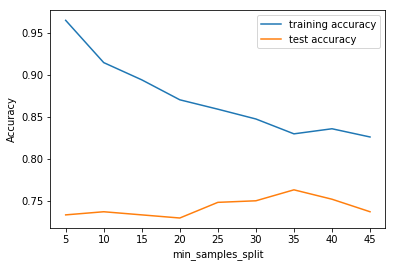

In [36]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 10, 2),
    'min_samples_leaf': range(10, 20, 5),
    'min_samples_split': range(20, 50, 5),
    'n_estimators': [100,1200, 300], 
    'max_features': [2 ,4]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [38]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 10, 2), 'min_samples_leaf': range(10, 20, 5), 'min_samples_split': range(20, 50, 5), 'n_estimators': [100, 1200, 300], 'max_features': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [39]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7783985102420856 using {'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 15, 'min_samples_split': 40, 'n_estimators': 100}


In [40]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=15, 
                             min_samples_split=40,
                             max_features=4,
                             n_estimators=100)

In [41]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
# predict
predictions = rfc.predict(X_test)

In [43]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       150
          1       0.70      0.59      0.64        81

avg / total       0.76      0.77      0.76       231



In [45]:
print(accuracy_score(y_test,predictions))

0.7662337662337663
